##**Lab 11** 😀

**Name**: Taimoor Arhad
**Class**: BESE-10B
**CMS**: 294035

**Comments**: Very difficult and tricky lab. 😠

# Initialization

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.  In this notebook, you will see how different initializations lead to different results. 

A well chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

To get started, run the following cell to load the packages and the planar dataset you will try to classify.

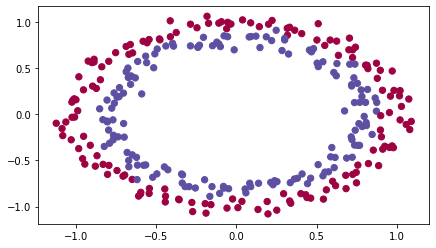

In [135]:
import torch
from torch import nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt
import random
random.seed(0)

torch.manual_seed(0)
# Data set 
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
# Visualize the data
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);

# Training and test data
train_x = torch.Tensor(train_X) 
train_y = torch.Tensor(train_Y)

test_x = torch.Tensor(test_X) 
test_y = torch.Tensor(test_Y)

You would like a classifier to separate the blue dots from the red dots.

Some helper functions.

In [136]:
# Some helper functions
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    d = np.c_[xx.ravel(), yy.ravel()]
    # Predict the function value for the whole grid
    Z = model(torch.from_numpy(d.astype('float32')))
    Z = (Z>.5)*1.
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z.detach().numpy(), cmap=plt.cm.Spectral, alpha=.5)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.title('Decision Boundary')
    plt.show()
# plot the results

def plot_cost_history(J_history):
    plt.plot(J_history)
    plt.title('Convergence plot of gradient descent')
    plt.xlabel('No of iterations')
    plt.ylabel('J')
    plt.show()

## 1 - Neural Network model 
You will use a neural network with two hidden layers and an output layer (the model is already implemented for you):
 - First hidden layer with 10 neuron and ReLU activation function
 - Second Hidden Layer with 5 neurons and ReLU activation function
 - Output layer with 1 neuron and sigmoid activation function
 
You also need to implement three initialization methods|
- *init_weights_zero* -- already implemented for you
- *init_weights_random* -- This initializes the weights to random values with standard deviation equal to 10
- *He initialization* -- This initializes the weights to random values scaled according to a paper Kaiming He et al., 2015. 

In [137]:
def init_weights_zero(m):
    with torch.no_grad():
        if type(m) == nn.Linear:
            m.weight.fill_(0.0)
            m.bias.fill_(0.0)
            
class Model(nn.Module):
    def __init__(self, in_feat=2):
        super(Model, self).__init__()
        
        self.feature = nn.Sequential(nn.Linear(in_feat, 10),
                                   nn.ReLU(),
                                   nn.Linear(10, 5),
                                   nn.ReLU(),
                                   nn.Linear(5, 1),
                                   nn.Sigmoid()
                                )    
        self.apply(init_weights_zero)    
                
    def forward(self, x):
        return self.feature(x)     
print(Model())

def train(hypothesis, optimizer, Cost, train_x, train_y):
    J_history = []
    for epoch in range(15000):
    
        optimizer.zero_grad()
        # forward pass
        out = hypothesis(train_x)

        loss = Cost(out.flatten(), train_y)

        # backward pass
        loss.backward()

        # update paramters
        optimizer.step()

        if epoch % 1000 == 0:        
            print(f'Iter {epoch+1} Loss: {loss.item()}')

        J_history += [loss.item()]
    return J_history

Model(
  (feature): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


## 2 - Zero initialization

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

Print the weights and carry out the training

In [138]:
hypothesis = Model()
hypothesis.apply(init_weights_zero)
for n,p in hypothesis.named_parameters():
    print(p)

Parameter containing:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([[0., 0., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [139]:
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.BCELoss() # Negative log likelihood loss

J_history = train(hypothesis, optimizer, Cost, train_x, train_y)

Iter 1 Loss: 0.6931473016738892
Iter 1001 Loss: 0.6931473016738892
Iter 2001 Loss: 0.6931473016738892
Iter 3001 Loss: 0.6931473016738892
Iter 4001 Loss: 0.6931473016738892
Iter 5001 Loss: 0.6931473016738892
Iter 6001 Loss: 0.6931473016738892
Iter 7001 Loss: 0.6931473016738892
Iter 8001 Loss: 0.6931473016738892
Iter 9001 Loss: 0.6931473016738892
Iter 10001 Loss: 0.6931473016738892
Iter 11001 Loss: 0.6931473016738892
Iter 12001 Loss: 0.6931473016738892
Iter 13001 Loss: 0.6931473016738892
Iter 14001 Loss: 0.6931473016738892


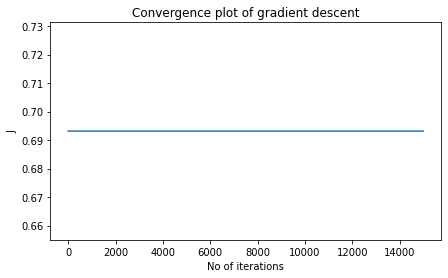

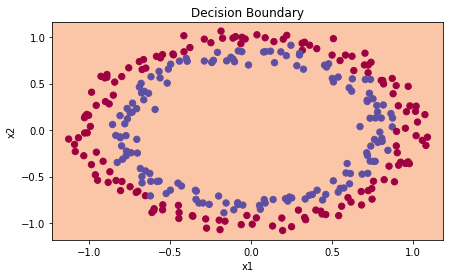

Test accuracy:  tensor(0.5000)


In [140]:
# plot the results
plot_cost_history(J_history)
plot_decision_boundary(hypothesis, train_x, train_y)

out = hypothesis(test_x)
print('Test accuracy: ', torch.sum((out.flatten()>.5)*1 == test_y)/(1.0*test_y.shape[0]))

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing. Why? Lets look at the details of the predictions and the decision boundary:
    
    The model is predicting p = 0.5 for every example. 

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 
    
    
    <font color='blue'>
**What you should remember**:
- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 

## 3 - Random initialization

To break symmetry, lets intialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. In this exercise, you will see what happens if the weights are intialized randomly, but to very large values. 

**Exercise**: Implement the following function to initialize your weights to large random values (scaled by \*10) and your biases to zeros. 

In [141]:
def init_weights_random(m):
    with torch.no_grad():
        
        if type(m) == nn.Linear:
             torch.nn.init.xavier_normal(m.weight, gain = 10)
             nn.init.constant_(m.bias.data, 0)
             print(m.weight)
        ### END CODE HERE ###

    
   




In [142]:
hypothesis = Model()
hypothesis.apply(init_weights_random)

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.BCELoss() # Negative log likelihood loss

J_history = train(hypothesis, optimizer, Cost, train_x, train_y)

Parameter containing:
tensor([[ 2.8876,  2.3680],
        [ 1.0953, -8.4056],
        [-4.0011,  0.2470],
        [-1.9961, -6.4385],
        [ 1.4735, -5.5248],
        [-0.8455, -1.0156],
        [-2.5329,  4.0351],
        [-1.7644, -4.5669],
        [ 1.5447, -3.1859],
        [-3.5676, -2.9916]], requires_grad=True)
Parameter containing:
tensor([[-3.9125e+00, -4.2594e-01, -3.7135e+00, -5.2775e+00, -2.9495e+00,
          4.3728e+00, -6.6988e+00,  1.5339e+00, -1.2125e-01, -1.5286e+00],
        [-9.3331e-01, -1.4176e+00, -1.2203e+00,  3.4774e+00, -1.6883e+00,
         -2.2198e+00,  3.6795e+00,  3.6684e+00, -1.5830e+00,  4.2667e+00],
        [ 2.8130e+00,  1.4265e+00,  1.0574e+00, -1.0069e+01, -8.1637e+00,
          5.3532e+00, -4.4514e+00, -4.1303e+00, -3.4038e-03, -5.9407e-01],
        [-9.0454e-01,  8.8355e+00, -2.0073e+00, -3.6297e+00,  4.7496e+00,
          1.1760e+00, -3.7087e-01,  7.5218e-01,  4.4432e+00,  4.5129e+00],
        [-3.6592e-01,  7.8010e+00,  1.6588e+00,  1.8222e+00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  """


Iter 1001 Loss: 33.9501838684082
Iter 2001 Loss: 33.93744659423828
Iter 3001 Loss: 33.95615768432617
Iter 4001 Loss: 33.95878982543945
Iter 5001 Loss: 33.9509162902832
Iter 6001 Loss: 33.95309066772461
Iter 7001 Loss: 33.94718933105469
Iter 8001 Loss: 33.913516998291016
Iter 9001 Loss: 33.632469177246094
Iter 10001 Loss: 33.52273941040039
Iter 11001 Loss: 33.64848327636719
Iter 12001 Loss: 33.652587890625
Iter 13001 Loss: 33.3189811706543
Iter 14001 Loss: 32.87649154663086


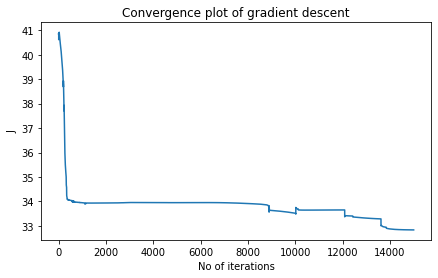

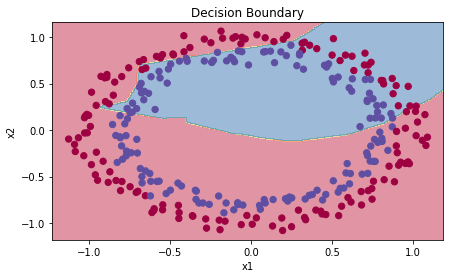

Test accuracy:  tensor(0.5900)


In [143]:
# plot the results
plot_cost_history(J_history)
plot_decision_boundary(hypothesis, train_x, train_y)

out = hypothesis(test_x)
print('Test accuracy: ', torch.sum((out.flatten()>.5)*1 == test_y)/(1.0*test_y.shape[0]))

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

<font color='blue'>
**In summary**:
- Initializing weights to very large random values does not work well. 
- Hopefully intializing with small random values does better. The important question is: how small should be these random values be? 

## 4 - Kaiming He initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. 

**Exercise**: Implement the following function to initialize your parameters with He initialization.

In [144]:
def init_weights_kaiming_he(m):
    with torch.no_grad():
        if type(m) == nn.Linear:
            #todo
          torch.nn.init.kaiming_uniform(m.weight)
          

In [145]:
hypothesis = Model()
hypothesis.apply(init_weights_kaiming_he)

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.BCELoss() # Negative log likelihood loss

J_history = train(hypothesis, optimizer, Cost, train_x, train_y)

Iter 1 Loss: 0.8163967728614807


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  """


Iter 1001 Loss: 0.6453205943107605
Iter 2001 Loss: 0.5936203002929688
Iter 3001 Loss: 0.5075045228004456
Iter 4001 Loss: 0.3962767422199249
Iter 5001 Loss: 0.2841835618019104
Iter 6001 Loss: 0.20486679673194885
Iter 7001 Loss: 0.1562357097864151
Iter 8001 Loss: 0.12258842587471008
Iter 9001 Loss: 0.10163035988807678
Iter 10001 Loss: 0.08719076961278915
Iter 11001 Loss: 0.076744444668293
Iter 12001 Loss: 0.06884629279375076
Iter 13001 Loss: 0.06268700957298279
Iter 14001 Loss: 0.05773761123418808


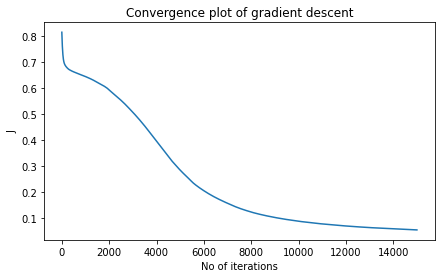

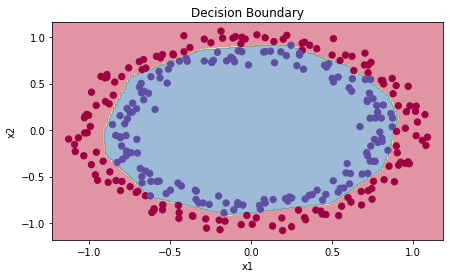

Test accuracy:  tensor(0.9300)


In [146]:
# plot the results
plot_cost_history(J_history)
plot_decision_boundary(hypothesis, train_x, train_y)

out = hypothesis(test_x)
print('Test accuracy: ', torch.sum((out.flatten()>.5)*1 == test_y)/(1.0*test_y.shape[0]))

Observations:

The model with He initialization separates the blue and the red dots very well.